# Declaration of Originality

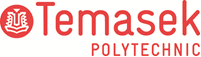

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shanza Eiliyah Binte Mohamed Sahrom
* Tutorial Group                : PC05
* Tutor						    : 
* Submission Date               : 10/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# For reproducibility
RANDOM_STATE = 42

# 1. Business Understanding
Problem Statement: This project aims to predict medical insurance charges for an individual based on their personal and health information such as age, BMI, and smoking status. Since medical charges are a continuous numeric value, this is a supervised regression problem.

Target Audience: Insurance analysts who need fast cost estimates, as well as customers who want to see an estimated range of charges based on their personal information.

Input Features nad target var: 
- Input features (X): age, sex, BMI, number of children, smoker status, region
- Target (y): charges (medical insurance charges)

Goal: Insurers can better estimate costs and set costs more fairly. Customers can better understand which factors increase their expected cost. The business can reduce losses from very high cost cases. I will evaluate the model using regression metrics such as MAE and RMSE. MAE shows the average prediction error in dollars, which is easy to understand for business use. RMSE penalises large errors more strongly, which is important because very high charges are costly mistakes. A good model should produce low MAE and RMSE on the test set, meaning that my predictions generalise well to new users.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("medical-charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Understanding

Medical Insurance Charges
- predict charges using the demographic and the lifestyle feature
- Target variable: charges (regression task)
- Numeric: age,bmi,children,charges
- Categorical: sex,smoker,region

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

This shows the data type of each column (numeric or categorical). Machine learning models can only work with numeric values. Categorical variables (such as sex, smoker, and region) must be encoded before training. This helps me identify which features need preprocessing (for example, one-hot encoding) and which ones can be used directly.

In [4]:
## Check for missing data
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This shows the number of missing values in each column. Missing values can cause model training to fail or bias the results. If missing values exist, I will decide whether to drop rows or fill in values. If there are no missing values, then no imputation is needed.

In [5]:
## Describe data distribution
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This table summarises the central tendency and spread of my numeric features (age, BMI, children, and charges), including the mean, median (50%), minimum, maximum, and quartiles.

The target variable, charges, has a very wide range from about 1,100 to over 63,000, which shows that there are some extreme high-cost cases. The standard deviation of charges is also high, meaning that medical costs vary a lot between individuals. The children feature has small discrete values (0–5), while age and BMI are continuous.

For modelling, the wide spread and extreme values of charges suggest that the target is right-skewed and contains outliers. This motivates me to consider more robust models (such as tree-based models) and to test a log transformation of the target to reduce the impact of extreme values on regression error metrics like RMSE.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

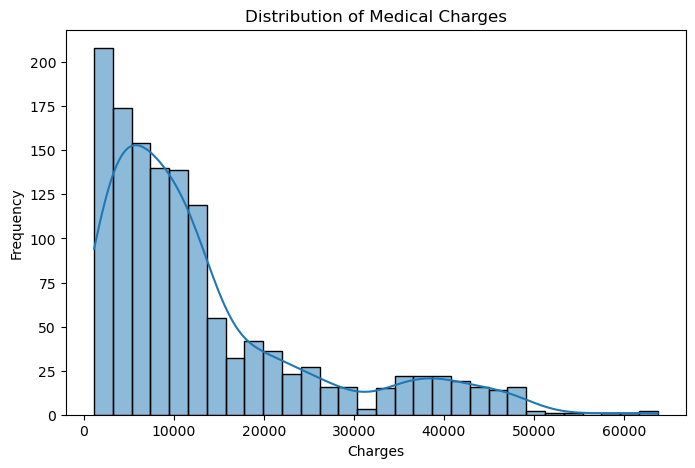

In [6]:
## Understanding distribution of target
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

This plot shows the distribution of medical charges across all individuals. The distribution is strongly right-skewed, where most people have relatively low charges and only a small number have very high medical costs. There is a long tail on the right side of the plot, which indicates the presence of high-cost outliers.

For modelling, a right-skewed target can cause regression models to focus too much on extreme values and lead to larger errors for typical cases. This means that error metrics like RMSE may be strongly affected by outliers, and applying a log transformation to charges could help stabilise the variance and improve overall model performance.

### 2.3.1.2 Understanding distribution of features

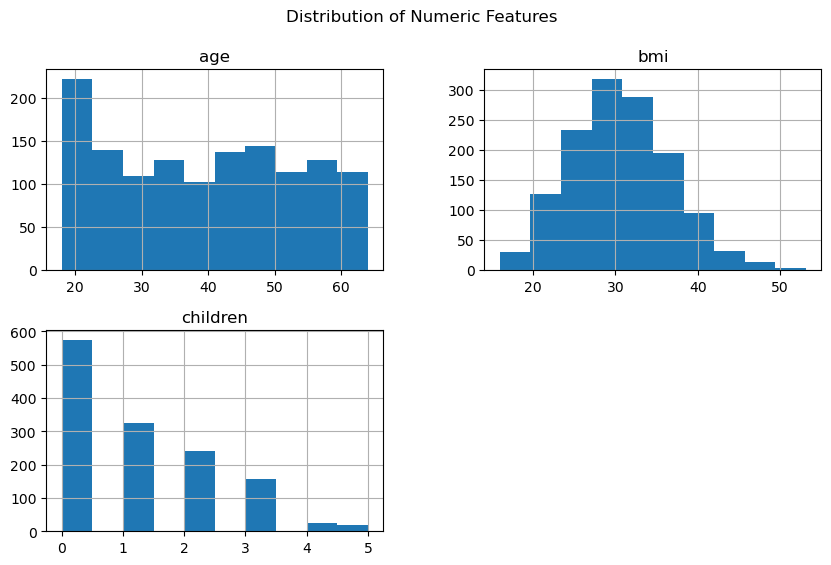

In [7]:
## Understanding distribution of features
num_cols = ['age', 'bmi', 'children']
df[num_cols].hist(figsize=(10,6))
plt.suptitle("Distribution of Numeric Features")
plt.show()

These histograms show the distributions of age, BMI, and number of children in the dataset. Age is fairly evenly spread across adult age groups. BMI is roughly bell-shaped, with most values around the middle range. The children feature is discrete and skewed towards smaller values, as most individuals have between 0 and 2 children.

For modelling, different feature distributions can affect how models behave. Linear models can be sensitive to feature scale and distribution, while tree-based models are usually more robust to non-normal distributions and discrete variables. This supports me comparing different model types later, such as Linear Regression and Random Forest.

### 2.3.2 Understanding relationship between variables

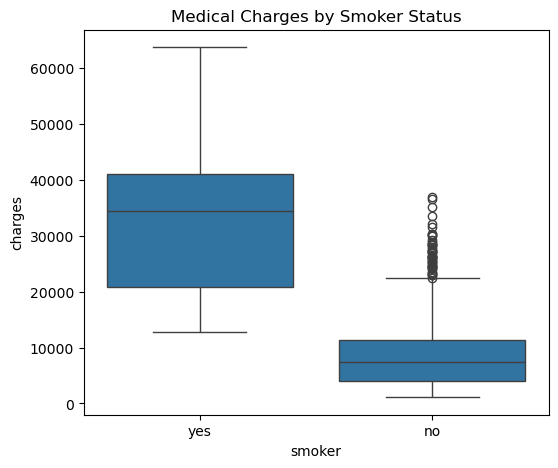

In [8]:
## Understanding relationship between variables
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoker Status")
plt.show()


This boxplot compares the distribution of medical charges between smokers and non-smokers. Smokers have much higher median charges than non-smokers, and the upper range of charges for smokers is also much higher, showing more extreme high-cost cases. The two distributions overlap very little, which suggests a strong difference between the two groups.

For modelling, smoker status is likely to be a very important predictor of medical charges, and my models should be able to capture this strong effect. The large difference in cost levels also suggests that interaction effects (such as smoker × age or smoker × BMI) could further improve prediction performance.

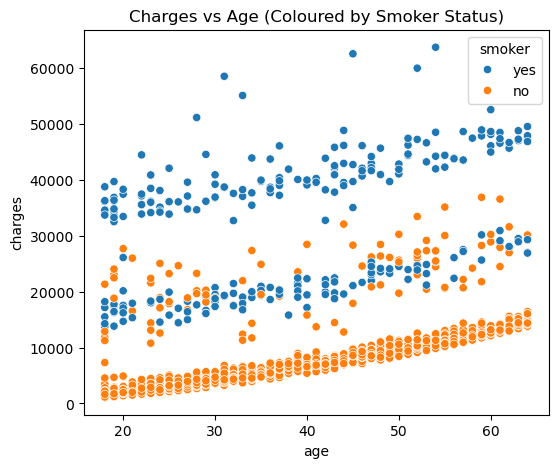

In [9]:
## age vs charges ( relationship)
plt.figure(figsize=(6,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (Coloured by Smoker Status)")
plt.show()


This scatter plot shows how medical charges change with age, with points coloured by smoker status. Charges generally increase with age for both smokers and non-smokers, but smokers consistently have much higher charges across all age groups. The relationship between age and charges is not perfectly linear, especially for smokers.

For modelling, this non-linear pattern suggests that simple linear models may not fully capture the relationship. Tree-based or ensemble models (such as Random Forest) may perform better, and adding interaction features like age × smoker could help improve prediction accuracy.

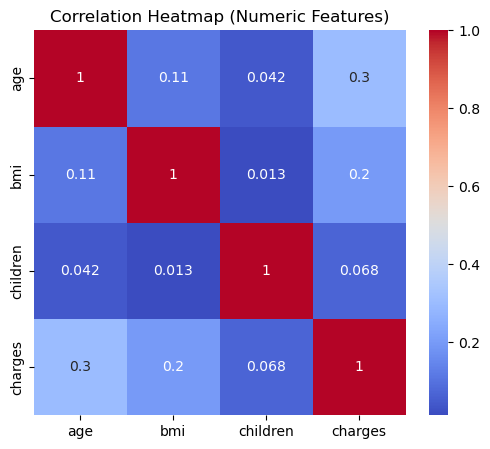

In [10]:
## correlation heatmap ( numeric relationship)
plt.figure(figsize=(6,5))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


This heatmap shows the pairwise correlations between my numeric features and the target variable. Age and BMI have a moderate positive correlation with charges, which means higher age and BMI are linked to higher medical costs. The children feature has a weak correlation with charges, so it may be a less important predictor on its own. Correlations among the features are relatively low, which suggests there is little multicollinearity between the numeric variables.

For modelling, features with higher correlation to the target (such as age and BMI) are likely to be useful. However, low correlation does not mean a feature is not helpful, especially for non-linear models that can learn more complex relationships. This further supports me comparing both linear and non-linear models in later stages.

# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
## Clean data
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

# Remove duplicates only if they exist
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found. No rows removed.")

Number of duplicate rows: 1
Duplicates removed. New shape: (1337, 7)


This code checks whether there are any exact duplicate rows in my dataset using `df.duplicated().sum()`. If duplicates are found, it removes them using `drop_duplicates()` and resets the index.

I do this because duplicate rows can cause the model to see the same example more than once, which can bias the learning process and make the evaluation results look better than they really are. Removing duplicates helps ensure that the dataset represents unique individuals.

In my case, I found 1 duplicate row, so removing it reduced the dataset from 1338 rows to 1337 rows. This is only a small change and does not reduce the dataset too much, but it improves the overall data quality.

For modelling, this helps my model train on clean, non-repeated samples and supports fair evaluation on unseen test data.

In [12]:
##missing values check
missing = df.isna().sum()
print("Missing values per column:\n", missing)

# If any missing values exist, drop rows (safe for this dataset size) OR impute later.
# We'll only drop rows if missing exists.
if missing.sum() > 0:
    df = df.dropna().reset_index(drop=True)
    print("Missing rows removed. New shape:", df.shape)
else:
    print("No missing values found. No rows removed.")


Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values found. No rows removed.


This code counts the number of missing values in each column using `df.isna().sum()`. I do this because many machine learning algorithms cannot handle missing values directly, and missing data can also introduce bias if it is not handled properly.

In my case, all columns have 0 missing values, so no rows were removed and no imputation is needed.

For modelling, this means I can proceed without adding extra missing-value handling steps, which keeps my pipeline simpler and less error-prone for deployment.

In [ ]:
#check for weird invalid values
print("Age min/max:", df["age"].min(), df["age"].max())
print("BMI min/max:", df["bmi"].min(), df["bmi"].max())
print("Children min/max:", df["children"].min(), df["children"].max())
print("Charges min/max:", df["charges"].min(), df["charges"].max())

# Check for impossible values (should be none for this dataset)
invalid_age = (df["age"] <= 0).sum()
invalid_bmi = (df["bmi"] <= 0).sum()
invalid_children = (df["children"] < 0).sum()
invalid_charges = (df["charges"] <= 0).sum()

print("Invalid age rows (<=0):", invalid_age)
print("Invalid bmi rows (<=0):", invalid_bmi)
print("Invalid children rows (<0):", invalid_children)
print("Invalid charges rows (<=0):", invalid_charges)

# Remove invalid rows only if they exist
df = df[(df["age"] > 0) & (df["bmi"] > 0) & (df["children"] >= 0) & (df["charges"] > 0)].reset_index(drop=True)
print("Shape after removing invalid rows (if any):", df.shape)


Age min/max: 18 64
BMI min/max: 15.96 53.13
Children min/max: 0 5
Charges min/max: 1121.8739 63770.42801
Invalid age rows (<=0): 0
Invalid bmi rows (<=0): 0
Invalid children rows (<0): 0
Invalid charges rows (<=0): 0
Shape after removing invalid rows (if any): (1337, 7)


This code prints the minimum and maximum values for key numeric columns and checks for impossible values (such as age ≤ 0, BMI ≤ 0, negative children, or charges ≤ 0). If any invalid rows are found, it removes them.

I do this to prevent “garbage data” from entering my model, because invalid values can break model assumptions and lead to unrealistic predictions (for example, negative charges).

In my results, all values fall within realistic ranges and the invalid row counts are 0, so no extra rows were removed. The dataset remains at (1337, 7) after cleaning.

For modelling, this means my model is trained on realistic data, which improves reliability and makes the Streamlit predictions more trustworthy.

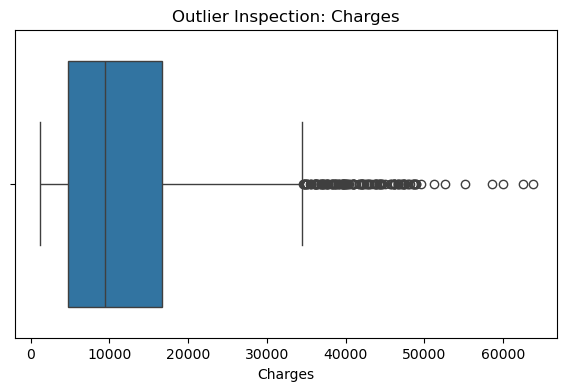

IQR lower bound: -13120.716174999998
IQR upper bound: 34524.777625
Number of potential high outliers: 139


In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["charges"])
plt.title("Outlier Inspection: Charges")
plt.xlabel("Charges")
plt.show()

# IQR boundaries (for reference)
Q1 = df["charges"].quantile(0.25)
Q3 = df["charges"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR lower bound:", lower_bound)
print("IQR upper bound:", upper_bound)
print("Number of potential high outliers:", (df["charges"] > upper_bound).sum())


This code visualises charges using a boxplot and calculates the IQR bounds (Q1, Q3, and IQR). Values above the upper bound are flagged as possible high outliers.

I do this because outliers matter, as regression metrics like RMSE can be strongly affected by extreme values. High charges may be real cases (such as severe illness), so I identify them instead of removing them blindly.

From the results, the upper outlier threshold is about 34,525, and there are 139 high-charge cases above this value. The lower bound is negative, which is not meaningful for charges, so my main concern is the high-end outliers.

For modelling, I will not remove these outliers automatically because high medical costs can be legitimate. Instead, I will handle skew and outliers through model choice (such as tree-based models) and possibly apply a log transformation to charges during feature engineering to reduce the impact of extreme values.

In [15]:
# Define target and features
X = df.drop(columns=["charges"])
y = df["charges"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Features:", list(X.columns))

X shape: (1337, 6)
y shape: (1337,)
Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


## 3.2 Train-Test Split

In [16]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (1069, 6)
X_test : (268, 6)
y_train: (1069,)
y_test : (268,)


I do this because testing on unseen data simulates real-world usage. Without a test set, I might wrongly think my model is good when it has only memorised the training data.

In my setup, I train on 1,069 rows and test on 268 rows. The test set is kept separate and is not used during training.

For modelling, this allows me to evaluate MAE and RMSE honestly later, which helps ensure that my model generalises well to new data.

In [ ]:
#identify feature types ( i want to check again)
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['age', 'bmi', 'children']
Categorical features: ['sex', 'smoker', 'region']


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

print(preprocessor)


ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region']),
                                ('num', 'passthrough',
                                 ['age', 'bmi', 'children'])])


This code builds a preprocessing pipeline where categorical features are converted into numeric columns using OneHotEncoder, while numeric features are passed through without change. The setting `handle_unknown="ignore"` prevents my app from crashing if a new category appears during deployment.

I do this to make sure the preprocessing is consistent and reusable. This is safer than manual encoding because the same logic is applied during training and when my Streamlit app makes predictions.

For modelling and deployment, using a pipeline reduces human error and makes it easier for me to save the full preprocessing and model together as one bundle.

In [19]:
# apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape :", X_test_processed.shape)


Processed X_train shape: (1069, 11)
Processed X_test shape : (268, 11)


This code uses `fit_transform(X_train)` to learn the encoding categories from the training data and transform it, and then uses `transform(X_test)` to apply the same transformation to the test set.

I do this because I must never fit preprocessing on the test set, as this would leak information from the test data into the training process and give unrealistically good results.

After encoding, the number of features increased from 6 to 11 because one-hot encoding expanded categorical columns into multiple binary columns (for example, region becomes several region_* columns).

For modelling, the data is now fully numeric and ready to be used to train scikit-learn regression models.

In [20]:
# get feature names after encoding
ohe = preprocessor.named_transformers_["cat"]
encoded_cat_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = encoded_cat_names + numeric_features

print("Total features after encoding:", len(all_feature_names))
print("First 15 features:", all_feature_names[:15])


Total features after encoding: 11
First 15 features: ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age', 'bmi', 'children']


This code retrieves the new feature names created after one-hot encoding. I do this to improve transparency, so I can see exactly what my model is learning from. It also helps with debugging and explaining the model to others.

From the results, categorical features are expanded into separate binary indicators (0 or 1). For example, `smoker_yes = 1` means the person is a smoker, and `region_northwest = 1` means the person is from that region.

For modelling, this allows my model to learn separate effects for each category, which is more informative than treating categories as simple numbers.

# 4. Modelling

### 4.2 Train Model

In [22]:
## set evaluation metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

This code trains three different regression models (Linear Regression, Decision Tree, and Random Forest) using the same preprocessing pipeline. For each model, I combine preprocessing and modelling into a single pipeline, fit the pipeline on the training data, generate predictions on the unseen test set, and evaluate performance using MAE, RMSE, and R².

I use this approach to make sure that the exact same preprocessing steps are applied consistently during both training and testing. This helps avoid data leakage and keeps the comparison fair. Training multiple models also allows me to compare a simple linear model, a single non-linear tree model, and an ensemble model made up of many trees. This supports choosing a model based on actual performance rather than assumptions.

For modelling, this structured comparison helps me identify which algorithm best captures the relationships in the medical cost data, especially given the non-linear patterns I observed earlier (such as the interaction between smoker status and age).

**Evaluation metrics:**
MAE (Mean Absolute Error) shows the average dollar error of my predictions, which is easy to understand in a business context (for example, “on average, the model is off by a few thousand dollars”). RMSE (Root Mean Squared Error) penalises large errors more strongly, which is useful because medical charges include some very high-cost cases. R² (Coefficient of Determination) shows how much of the variation in charges is explained by the model.

I use multiple metrics to get a more complete view of performance, because a model can look good on one metric but perform poorly on another (for example, a good R² but a high RMSE due to outliers).

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae, rmse, r2 = evaluate_regression(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results).sort_values(by="MAE")
results_df


,Model,MAE,RMSE,R2
2,Random Forest,2537.126085,4608.867188,0.884403
1,Decision Tree,2760.967152,6086.968046,0.798368
0,Linear Regression,4177.045561,5956.342894,0.806929


The Random Forest model achieved the lowest MAE, the lowest RMSE, and the highest R², which means it had the smallest average prediction error, handled extreme high charges better, and explained the most variation in medical charges.

Random Forest performs best because it is an ensemble of many decision trees. It can model non-linear relationships, capture feature interactions (such as smoker × age and smoker × BMI), and reduce overfitting compared to a single decision tree. These strengths match the patterns I observed in EDA, where smoker status and age showed strong, non-linear effects on charges.

For model selection, I chose Random Forest as the best baseline model based on the actual results. This model will be my starting point for further improvement through feature engineering and hyperparameter tuning.

The model with the lowest MAE on the test set is Random Forest, which shows that it gives the most accurate predictions on average. I prioritise MAE because it is easy to interpret in business terms as average dollar error, which is important for a healthcare cost prediction system.

For the next step, I will use Random Forest as my main candidate for feature engineering experiments, hyperparameter tuning, and final model deployment.

In [24]:
best_baseline_model = results_df.iloc[0]["Model"]
print("Best baseline model (lowest MAE):", best_baseline_model)

Best baseline model (lowest MAE): Random Forest


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection